# Predicting Stock Prices - Apple Stock #

Import Libraries

In [22]:
# Import libraries
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Import Stock data

In [23]:
# Ran into the problem where data_reader didn't work. Use yf instead.
# Modify to ask for user input and what information they want
apple = yf.download(tickers='AAPL',start='2012-01-01',end='2019-12-18', interval='1d')
apple

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.519281,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.586559,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.726295,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.859334,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.838938,394024400
...,...,...,...,...,...,...
2019-12-11,67.202499,67.775002,67.125000,67.692497,66.316811,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,66.485817,137310400
2019-12-13,67.864998,68.824997,67.732498,68.787498,67.389572,133587600


In [24]:
# Get the number of rows and column in data set
apple.shape

(2003, 6)

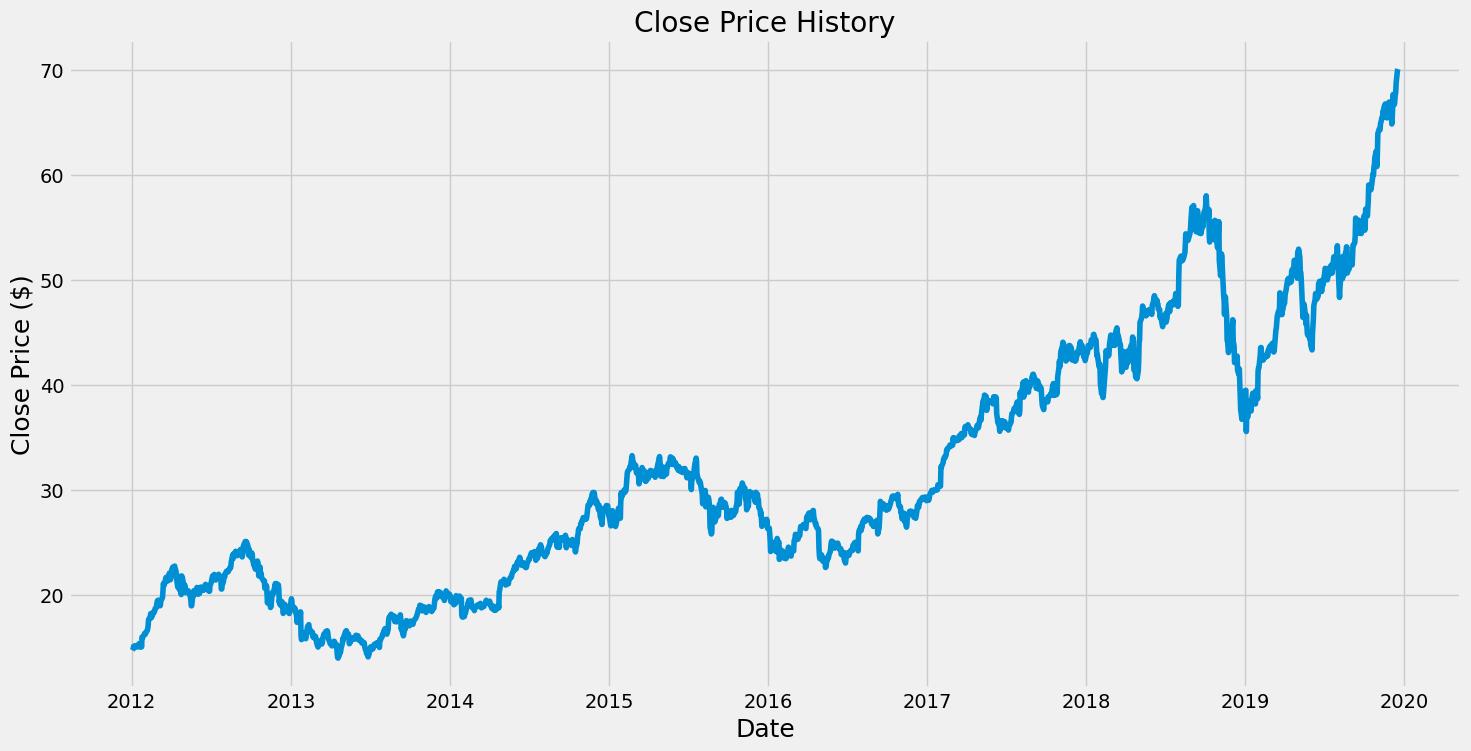

In [25]:
# Plot our data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(apple.index, apple['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($)',fontsize=18)
plt.show()

Create the Dataset for analysis

In [26]:
# Create a new data frame only the 'Close' column
data = apple.filter(['Close'])    # The dates will still remain as they are an index for the apple dataframe.
print(data)
# Convert the dataframe to a numpy array
dataset = data.values
print(dataset)
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)   # The ceil() rounds the value up.
print(training_data_len)

                Close
Date                 
2012-01-03  14.686786
2012-01-04  14.765714
2012-01-05  14.929643
2012-01-06  15.085714
2012-01-09  15.061786
...               ...
2019-12-11  67.692497
2019-12-12  67.864998
2019-12-13  68.787498
2019-12-16  69.964996
2019-12-17  70.102501

[2003 rows x 1 columns]
[[14.6867857 ]
 [14.76571369]
 [14.92964268]
 ...
 [68.78749847]
 [69.96499634]
 [70.10250092]]
1603


Normalize the Dataset

In [27]:
# Scale the data. We scale the data, a preprocessing step, for transformation/ NORMALIZATION. It's good practice
print(dataset.shape)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)     # This transforms the range of values between min to max of the dataset to fit the scaler.
scaled_data
type(scaled_data)

(2003, 1)


numpy.ndarray

Split the Data into Training Dataset

In [28]:
# Create the training dataset.
# Create the scaled training dataset.
train_data = scaled_data[0:training_data_len,:] # Will get 80% of the scaled dataset
#Split the data into x_train and y_train data sets
x_train = []    # A list data type
y_train = []

''' Why start with a range of sixty?''' # Last sixty days
''' How do you determine how many training data values are required?'''
for i in range(60,len(train_data)):     # a list of index of 1543 will be produced.
    x_train.append(train_data[i-60:i,0])    # Each index in the list will have an array of 60 values. ie arrays in a list.
    y_train.append(train_data[i,0])     # Each index in the list will a single value.
    if i<=60:   # This if statement is for demonstration purposes. Don't be too concerned with this
        print(x_train)  # Will give the first to 60th dataset (ie the 0 to 59th index)
        print(y_train)  # will give the 61st data dataset (ie the 60th index)
        print()
print(x_train) # This will give the number of arrays that exist, 1543, not individual elements.
print(type(x_train))
'''Why are so many arrays are required?'''
# The reason why y_train is the ith value after 0 to (i-1)th x_train values is because it is the resulting outcome from the 0 to (i-1)th trend

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01

'Why are so many arrays are required?'

In [29]:
# Convert the x_train and y_train to numpy arrays.
# This will be used to train the model.
x_train, y_train = np.array(x_train), np.array(y_train)

In [30]:
# Reshape the data
# We need to reshape because the model we are using is three dimensional, 3D.
# Number samples (1543), number time steps (60), number of features (closing price)
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape
print(x_train)

[[[0.01316509]
  [0.01457063]
  [0.01748985]
  ...
  [0.13766105]
  [0.14243103]
  [0.14442805]]

 [[0.01457063]
  [0.01748985]
  [0.02026915]
  ...
  [0.14243103]
  [0.14442805]
  [0.13949272]]

 [[0.01748985]
  [0.02026915]
  [0.01984303]
  ...
  [0.14442805]
  [0.13949272]
  [0.13293563]]

 ...

 [[0.52177011]
  [0.51927696]
  [0.51669488]
  ...
  [0.5857448 ]
  [0.59767603]
  [0.5912207 ]]

 [[0.51927696]
  [0.51669488]
  [0.51322235]
  ...
  [0.59767603]
  [0.5912207 ]
  [0.58926183]]

 [[0.51669488]
  [0.51322235]
  [0.51958863]
  ...
  [0.5912207 ]
  [0.58926183]
  [0.58164901]]]


Create the Model

In [31]:
# Build the LSTM Model
model = Sequential()
# Add a LSTM layer of 50 neurons, return_sequence is true since another LSTM layer will be used
model.add(LSTM(50,return_sequences=True,input_shape = (x_train.shape[1],x_train.shape[2])))
# return_sequence is False since not using any more LSTM layers
model.add(LSTM(50,return_sequences=False))
# Dense layer with 25 neurons
model.add(Dense(25))
#Dense layer with 1 neuron
model.add(Dense(1))

In [32]:
# Compile the Model
# Optimizer is used to improve upon the lost funciton, loss function is used to measure how well model did on training
model.compile(optimizer='adam',loss='mean_squared_error')

Train the Model

In [33]:
# Train the model
# batch size is the total number of training examples in a single batch
# epochs is the number of iterations when an entire dataset is passed forward and backward through a neural network
model.fit(x_train,y_train,batch_size=1,epochs=1)

1543/1543 [==============================] - 21s 13ms/step - loss: 7.2279e-04


Create the Testing Dataset

In [34]:
# Create the testing dataset
# training_data_len = 1603
# Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len-60:, :]   # test_data = scaled_data[1543 to 2003, :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :] # All the values we want the model to predict. 1603 to 2003

# For loop will produce 400 lists, each having an array at its index.
for i in range(60,len(test_data)):      # range is 60 to 460
    x_test.append(test_data[i-60:i,0])  # First index of list has an array of 60 values
    # The list's first index array will have i 0 to 59 which is the same as test_data = scaled_data[1543 to 1603,:]
    # The list's final index array will have i 400 to 459 which is the same as test_data = scaled_data[1943 to 2003,:]

In [35]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [36]:
# Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

Make Predictions

In [37]:
# Get the model's predicted price values
# We want the predictions to be the exact same values in our y_values dataset
predictions = model.predict(x_test)
# Unscaling/inversing the predicted values to pre-normalized values.
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 1s 6ms/step


In [38]:
# Get the root mean squared error (RMSE) - a measure of how accurate model predicts the response
# RMSE is the standard deviation of the residuals and the lower values of RMSE indicate a better fit
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.42045567512512205

Plot the Model Predictions

C:\Users\pauly\AppData\Local\Temp\ipykernel_916\2475801239.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


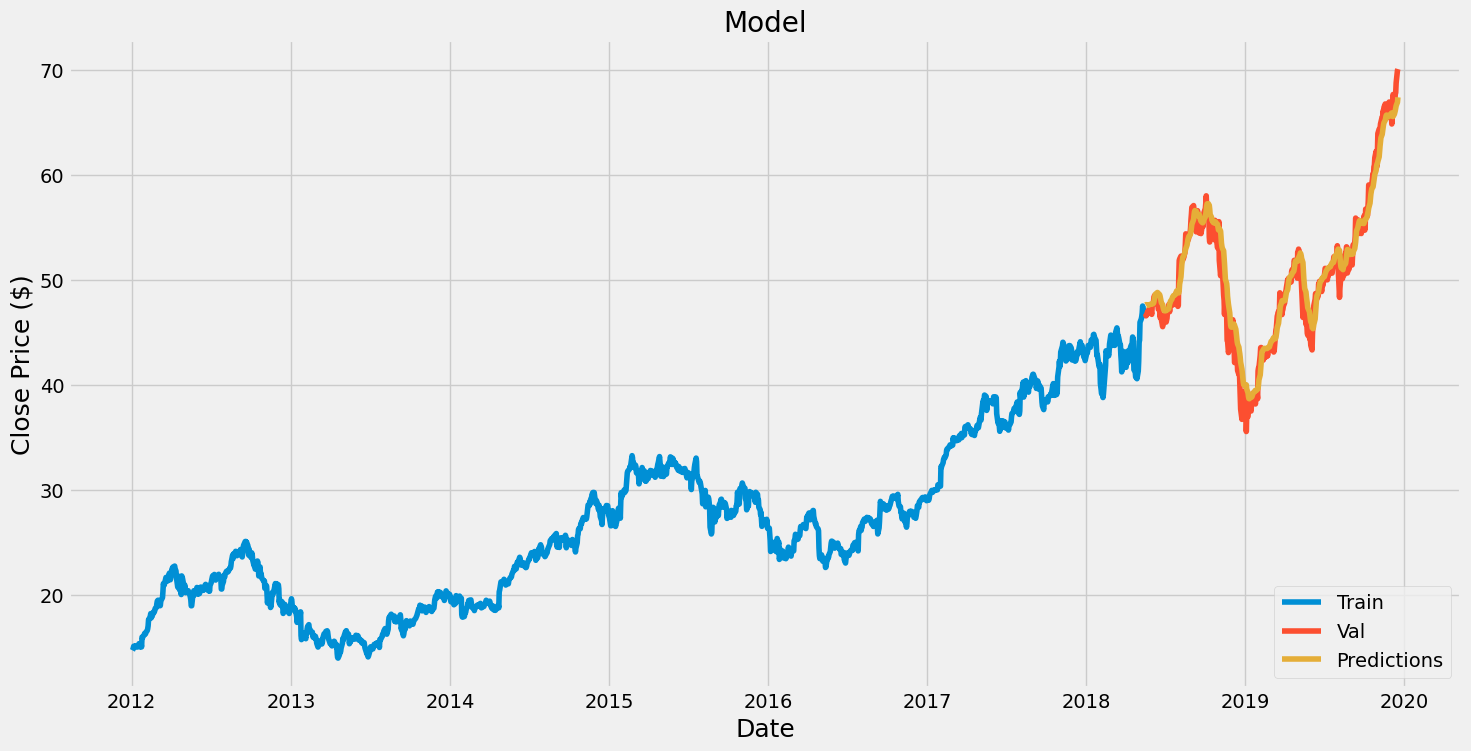

In [39]:
# Plot the data
train = data[:training_data_len]    # The original data of apple stock model was trained on
valid = data[training_data_len:]    # The true values we want to validate and compare our predictions
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [40]:
# Show the valid (true) and predicted price
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,47.618923
2018-05-18,46.577499,47.644890
2018-05-21,46.907501,47.610840
2018-05-22,46.790001,47.597008
2018-05-23,47.090000,47.578022
...,...,...
2019-12-11,67.692497,66.139740
2019-12-12,67.864998,66.368408
2019-12-13,68.787498,66.606354


In [41]:
# Try to predict the apple stock for another date: 2019-12-18
# Get the quote
apple_quote = yf.download(tickers='AAPL',start='2012-01-01',end='2019-12-18', interval='1d')
# Create a new dataframe
new_df = apple_quote.filter(['Close'])
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 to 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set a numpy array
X_test = np.array(X_test)
# Reshape the data to 3D
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 23ms/step
[[67.88253]]


In [42]:
apple_quote_2 = yf.download(tickers='AAPL',start='2019-12-18',end='2019-12-19')
print(apple_quote_2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2019-12-18    69.934998
Name: Close, dtype: float64
